In [1]:
from google.colab import drive
import os
import pandas as pd

# Monter Google Drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

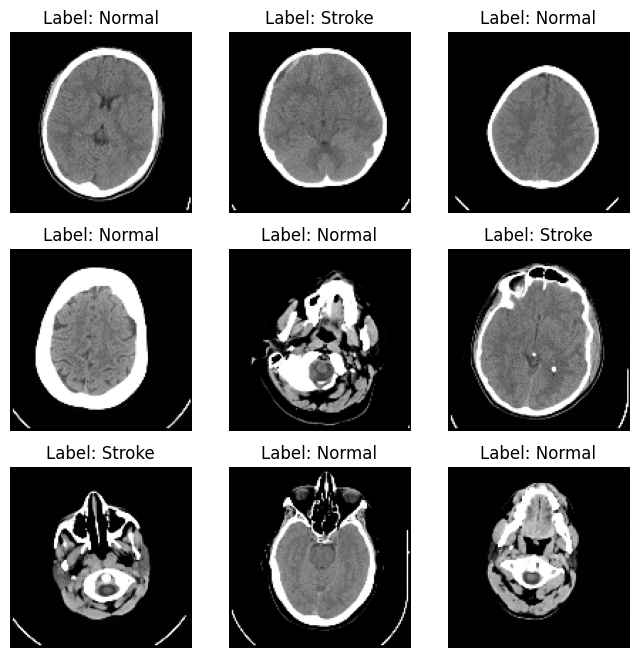

Shape des images : (2527, 128, 128)
Shape des labels : (2527,)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 📂 Chemin vers les images OneDrive (MODIFIER SI BESOIN)
onedrive_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Brain_Stroke_CT-SCAN_image'

# 📌 Chargement des images et labels
def load_images(onedrive_path):
    images = []
    labels = []

    for split in ["Train", "Test", "Validation"]:
        split_path = os.path.join(onedrive_path, split)

        for label in ["Normal", "Stroke"]:
            label_path = os.path.join(split_path, label)

            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)

                if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    continue

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#Les valeurs des pixels sont normalisées (entre 0 et 1) pour faciliter l'apprentissage du modèle.
#Le label correspondant (0 = Normal, 1 = Stroke) est ajouté à labels
                if img is not None:
                    img = cv2.resize(img, (128, 128))
                    images.append(img)

                    labels.append(0 if label == "Normal" else 1)

                    #Les valeurs des pixels sont normalisées (entre 0 et 1) pour faciliter l'apprentissage du modèle.

    images = np.array(images).astype('float32') / 255.0  # Normalisation
    labels = np.array(labels)

    return images, labels

# 🏗️ Charger les données
images, labels = load_images(onedrive_path)

# 🏷️ Séparation des données en Train et Test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 🔍 Afficher quelques images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {'Normal' if y_train[i] == 0 else 'Stroke'}")
    ax.axis('off')

plt.show()

# Vérification des dimensions
print("Shape des images :", images.shape)
print("Shape des labels :", labels.shape)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Construire le modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),  # détecte des motifs (formes, bords, etc.) dans l’image.
    layers.MaxPooling2D((2, 2)), # réduit la taille pour accélérer l’apprentissage.
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),    #transforme les données en un vecteur.
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 sortie pour la classification binaire   # 1 sortie (Normal vs Stroke) Donne un résultat entre 0 et 1 (probabilité que l’image soit un AVC).
])



# Compilation

#adam : méthode pour améliorer le modèle à chaque étape.

#binary_crossentropy : fonction de perte pour 2 classes.

#accuracy : indique à quel point le modèle est correct.

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Prédictions
predictions = model.predict(X_test)






#epochs=10 : Le modèle va parcourir les données 10 fois pour apprendre.
#batch_size=32 : Le modèle traite 32 images à la fois avant de mettre à jour ses paramètres.
#validation_data=(X_test, y_test) : Il vérifie sa performance sur les données de test après chaque époqu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 988ms/step - accuracy: 0.6099 - loss: 0.6728 - val_accuracy: 0.7095 - val_loss: 0.5246
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 993ms/step - accuracy: 0.7518 - loss: 0.4836 - val_accuracy: 0.8419 - val_loss: 0.3373
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8895 - loss: 0.2718 - val_accuracy: 0.8933 - val_loss: 0.2482
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 995ms/step - accuracy: 0.9545 - loss: 0.1268 - val_accuracy: 0.9269 - val_loss: 0.1615
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 998ms/step - accuracy: 0.9736 - loss: 0.0778 - val_accuracy: 0.9526 - val_loss: 0.1108
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9915 - loss: 0.0317 - val_accuracy: 0.9466 - val_loss: 0.1305
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9965 - loss: 0.0178 - val_accuracy: 0.9565 - val_loss: 0.1436
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.9585

In [ ]:
# Sauvegarder le modèle
model.save('model.h5')  # Sauvegarde du modèle dans un fichier .h5


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Charger le modèle enregistré
model = load_model('model.h5')

# Recompiler le modèle avec l'optimiseur et la fonction de perte appropriée
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Vous pouvez maintenant tester ou évaluer le modèle si nécessaire
# Par exemple, évaluation sur le jeu de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Perte : {test_loss}, Précision : {test_accuracy}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.9603 - loss: 0.1521
Perte : 0.13842056691646576, Précision : 0.9683794379234314


In [ ]:
import cv2
import numpy as np

# 1. Charger une nouvelle image
image_path = '/content/drive/MyDrive/Brain_Stroke_CT-SCAN_image/Brain_Stroke_CT-SCAN_image/Test/Normal/avc.jpg'  # Remplacez par le chemin réel de votre image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 2. Prétraiter l'image (redimensionner à 128x128 et normaliser)
img_resized = cv2.resize(img, (128, 128))  # Redimensionner l'image à la taille du modèle
img_normalized = img_resized.astype('float32') / 255.0  # Normalisation

# 3. Ajouter une dimension supplémentaire pour la compatibilité avec le modèle (batch size)
img_input = np.expand_dims(img_normalized, axis=-1)  # (128, 128, 1)
img_input = np.expand_dims(img_input, axis=0)  # (1, 128, 128, 1) pour correspondre à l'entrée du modèle

# 4. Faire la prédiction
prediction = model.predict(img_input)

# 5. Interpréter le résultat
if prediction[0] > 0.5:
    print("Le modèle prédit : AVC (Stroke)")
else:
    print("Le modèle prédit : Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Le modèle prédit : Normal
